In [1]:
import pandas as pd
import numpy as np
import glob
import os

In [2]:
pd. set_option("display.max_columns", None) 

In [3]:
df = pd.read_csv('./ios-fitness-and-medical-cleaned-data.csv')

In [4]:
df[:5]

,Unnamed: 0,App Name,Size,Age Rating,Languages,Price,InApp Purchase,Average Rating,Rating Count,Privacy Data,App Link,Number of Versions,Last Version Date,First Version Date,App Type
0,0,H and W Drug Store,21.5 MB,12+,"English, Spanish",0.00,False,4.0,4,NaN,https://apps.apple.com/us/app/h-and-w-drug-sto...,1,NaN,NaN,MEDICAL
1,1,H&P-card™,10.1 MB,17+,"English, Spanish",2.99,False,1.0,1,NaN,https://apps.apple.com/us/app/h-p-card/id56971...,5,"Sep 28, 2020","Oct 20, 2012",MEDICAL
2,2,H-Book – osobní zdravotní záznamy,47.1 MB,12+,"English, Czech",0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-book-osobn%C3%...,21,"Jun 28, 2017","Jun 5, 2013",MEDICAL
3,3,H-FACT,4.1 MB,12+,English,0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-fact/id1568969345,5,"Nov 24, 2021","Jul 5, 2021",MEDICAL
4,4,H-Module,27.6 MB,17+,NaN,0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-module/id15728...,2,"Jun 26, 2021","Jun 22, 2021",MEDICAL


#### Feature Engineering

In [5]:
def is_english_supported(language):
    return language.find('English') >=0

In [6]:
def determine_if_app_is_free_or_not(price):
    if (price > 0):
        return 'PAID'
    return 'FREE'

In [7]:
def grade_app_with_rating(app_rating):
    if ((app_rating >=0) and (app_rating <2.5)):
        return 'BAD'
    if ((app_rating >=2.5) and (app_rating <3.0)):
        return 'FAIR'
    if ((app_rating >=3.0) and (app_rating <4.0)):
        return 'GOOD'
    if ((app_rating >=4.0) and (app_rating <4.5)):
        return 'VERY GOOD'
    if (app_rating >=4.5):
        return 'EXCELLENT'

In [8]:
def create_rating_count_range(rating_count):
    if (rating_count >=1 and rating_count<5):
        return '1+'
    if (rating_count >=5 and rating_count<10):
        return '5+'
    if (rating_count >=10 and rating_count<50):
        return '10+'
    if (rating_count >=50 and rating_count<100):
        return '50+'
    if (rating_count >=100 and rating_count<500):
        return '100+'
    if (rating_count >=500 and rating_count<1000):
        return '500+'
    if (rating_count >=1000 and rating_count<5000):
        return '1,000+'
    if (rating_count >=5000 and rating_count<10000):
        return '5,000+'
    if (rating_count >=10000 and rating_count<50000):
        return '10,000+'
    if (rating_count >=50000 and rating_count<100000):
        return '50,000+'
    if (rating_count >=100000 and rating_count<500000):
        return '100,000+'
    if (rating_count >=500000 and rating_count<1000000):
        return '500,000+'
    if (rating_count >=1000000 and rating_count<5000000):
        return '1,000,000+'
    if (rating_count >=5000000 and rating_count<10000000):
        return '5,000,000+'
    if (rating_count >=10000000 and rating_count<50000000):
        return '10,000,000+'
    if (rating_count >=50000000 and rating_count<100000000):
        return '50,000,000+'
    return 0

In [9]:
def is_app_available_in_multiple_languages(languages):
    return len(languages.split(',')) > 1

In [10]:
def is_privacy_data_collected(privacy_data):
    if pd.notna(privacy_data):
        return True
    return False

In [11]:
def is_app_ever_updated(version_count):
    return version_count > 1

In [12]:
def is_app_updated_in_2022(last_updated_date, released_date, versions_count):
    if (versions_count < 2):
        return False
    if (last_updated_date == released_date):
        return False
    if '2022' in last_updated_date:
        return True
    return False

In [13]:
def perform_feature_engineering(df):
    lang_na_indexes = df[df['Languages'].isna()].index
    df.loc[lang_na_indexes, 'Languages'] = 'Not Specified'
    df['is_english_supported'] = df['Languages'].apply(is_english_supported)
    df['Service Type'] = df['Price'].apply(determine_if_app_is_free_or_not)
    df['App Grade'] = df['Average Rating'].apply(grade_app_with_rating)
    df['Rating Count Range'] = df['Rating Count'].apply(create_rating_count_range)
    df['is_available_in_multiple_langs'] = df['Languages'].apply(is_app_available_in_multiple_languages)
    df['is_privacy_data_collected'] = df['Privacy Data'].apply(is_privacy_data_collected)
    df['is_app_ever_updated'] = df['Number of Versions'].apply(is_app_ever_updated)
    for index in df.index:
        last_updated_date = df.at[index, 'Last Version Date']
        released_date = df.at[index, 'First Version Date']
        version = df.at[index, 'Number of Versions']
        df.at[index, 'is_updated_this_year'] = is_app_updated_in_2022(last_updated_date, released_date, version)

In [14]:
perform_feature_engineering(df)

In [15]:
df[:5]

,Unnamed: 0,App Name,Size,Age Rating,Languages,Price,InApp Purchase,Average Rating,Rating Count,Privacy Data,App Link,Number of Versions,Last Version Date,First Version Date,App Type,is_english_supported,Service Type,App Grade,Rating Count Range,is_available_in_multiple_langs,is_privacy_data_collected,is_app_ever_updated,is_updated_this_year
0,0,H and W Drug Store,21.5 MB,12+,"English, Spanish",0.00,False,4.0,4,NaN,https://apps.apple.com/us/app/h-and-w-drug-sto...,1,NaN,NaN,MEDICAL,True,FREE,VERY GOOD,1+,True,False,False,False
1,1,H&P-card™,10.1 MB,17+,"English, Spanish",2.99,False,1.0,1,NaN,https://apps.apple.com/us/app/h-p-card/id56971...,5,"Sep 28, 2020","Oct 20, 2012",MEDICAL,True,PAID,BAD,1+,True,False,True,False
2,2,H-Book – osobní zdravotní záznamy,47.1 MB,12+,"English, Czech",0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-book-osobn%C3%...,21,"Jun 28, 2017","Jun 5, 2013",MEDICAL,True,FREE,BAD,0,True,False,True,False
3,3,H-FACT,4.1 MB,12+,English,0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-fact/id1568969345,5,"Nov 24, 2021","Jul 5, 2021",MEDICAL,True,FREE,BAD,0,False,False,True,False
4,4,H-Module,27.6 MB,17+,Not Specified,0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-module/id15728...,2,"Jun 26, 2021","Jun 22, 2021",MEDICAL,False,FREE,BAD,0,False,False,True,False


#### VISUALIZATION

In [16]:
from matplotlib import pyplot
import seaborn as sbn
import seaborn as sbn

In [17]:
rating_count_range_order = ['0', '1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+', '50,000+', 
                                   '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+']

In [18]:
app_grade_order = ['BAD', 'FAIR', 'GOOD', 'VERY GOOD', 'EXCELLENT']

In [19]:
df['Rating Count Range'].value_counts()

0             56349
1+            25975
10+            9355
5+             7362
100+           3250
50+            2206
1,000+         1267
500+            848
10,000+         501
5,000+          361
50,000+         130
100,000+        129
500,000+         23
1,000,000+        6
Name: Rating Count Range, dtype: int64

In [20]:
def draw_histogram(data, x_axis_title, height=5, aspect=1.6):
    sbn.displot(data, color = 'darkblue', kind='hist', height=5, aspect=1.6)
    pyplot.xlabel(x_axis_title)
    pyplot.ylabel('Density')

In [21]:
def draw_count_plot(data, x_column, x_label, y_label, fig_size=(8,6), order=None, hue=None):
    sbn.set(rc = {'figure.figsize':fig_size})
    sbn.countplot(data=data, x=x_column, order=order, color='#1C8BAD', hue=hue )
    pyplot.xlabel(x_label)
    pyplot.ylabel(y_label)
    pyplot.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='large')
    pyplot.show()

In [22]:
def set_plot_labels(x_label, y_label, font_size):
    pyplot.xlabel(x_label)
    pyplot.ylabel(y_label)
    pyplot.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize=font_size)

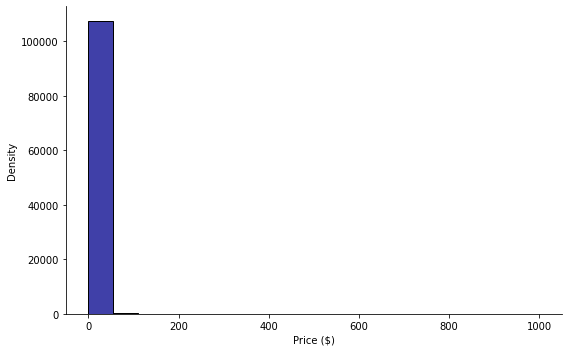

In [23]:
draw_histogram(df['Price'], 'Price ($)')

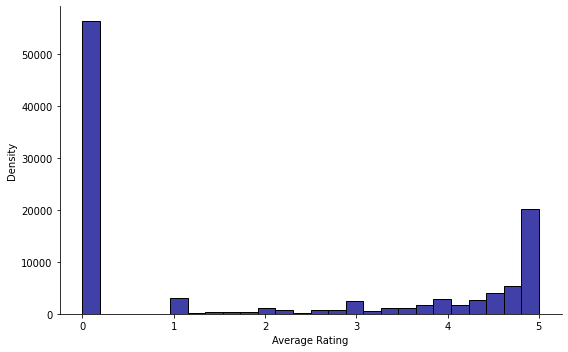

In [24]:
draw_histogram(df['Average Rating'], 'Average Rating')

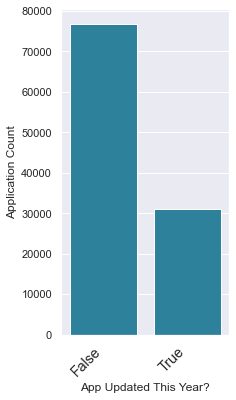

In [25]:
draw_count_plot(df, 'is_updated_this_year', 'App Updated This Year?', 'Application Count', fig_size=(3,6))

<AxesSubplot:xlabel='Average Rating', ylabel='Price'>

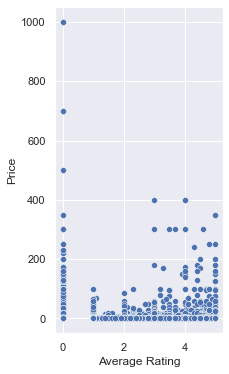

In [26]:
sbn.scatterplot(data=df, y='Price', x='Average Rating')

<AxesSubplot:xlabel='Average Rating', ylabel='Rating Count'>

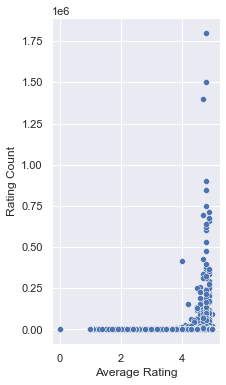

In [27]:
sbn.scatterplot(data=df, y='Rating Count', x='Average Rating')

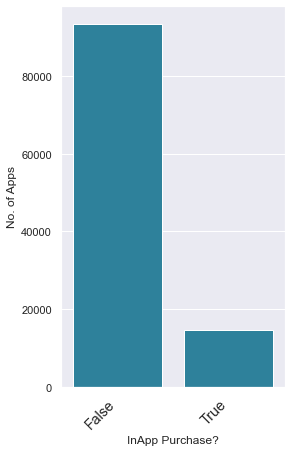

In [28]:
draw_count_plot(df, 'InApp Purchase', 'InApp Purchase?', 'No. of Apps', fig_size=(4,7))

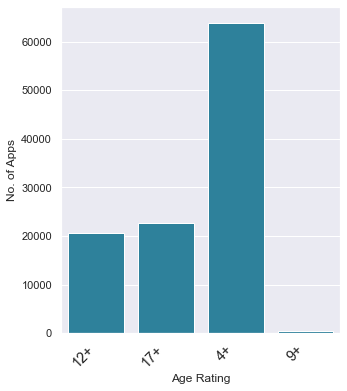

In [29]:
draw_count_plot(df, 'Age Rating', 'Age Rating', 'No. of Apps', fig_size=(5,6))

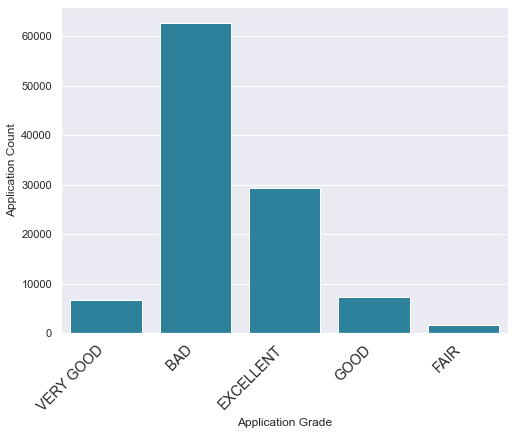

In [30]:
draw_count_plot(df, 'App Grade', 'Application Grade', 'Application Count', fig_size=(8,6))

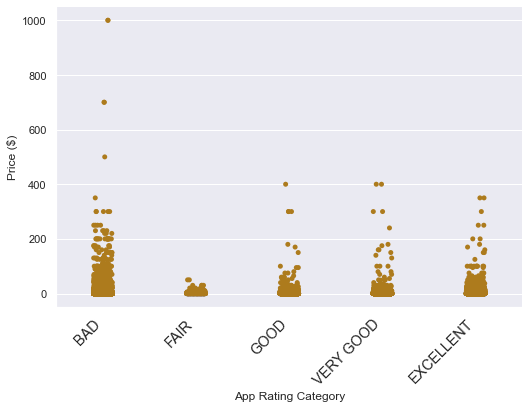

In [31]:
sbn.catplot(data=df, x='App Grade', y='Price',
            height=5, aspect=1.5, color="#AD7B1D", order=app_grade_order)
set_plot_labels('App Rating Category', 'Price ($)', 'large')

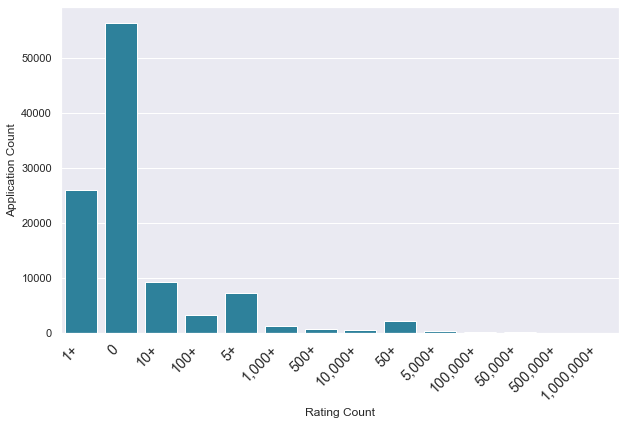

In [32]:
draw_count_plot(df, 'Rating Count Range', 'Rating Count', 'Application Count', fig_size=(10,6))

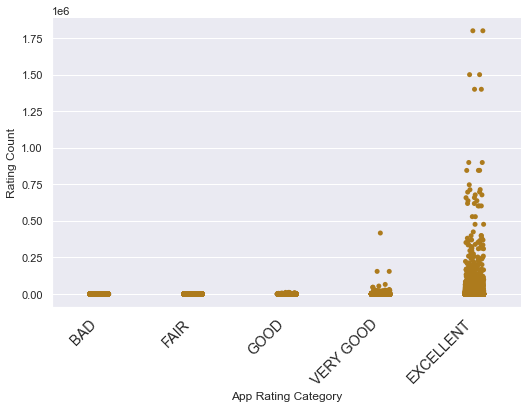

In [33]:
sbn.catplot(data=df, x='App Grade', y='Rating Count',
            height=5, aspect=1.5, color="#AD7B1D", order=app_grade_order)
set_plot_labels('App Rating Category', 'Rating Count', 'large')

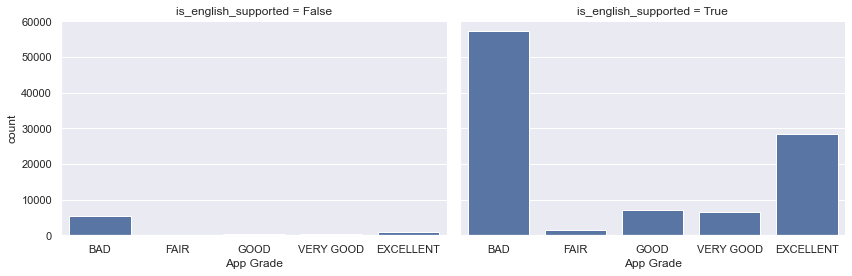

In [34]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="is_english_supported", height=4, aspect=1.5)
eng_supp_app_grade_plot.map(sbn.countplot, "App Grade", order=app_grade_order)

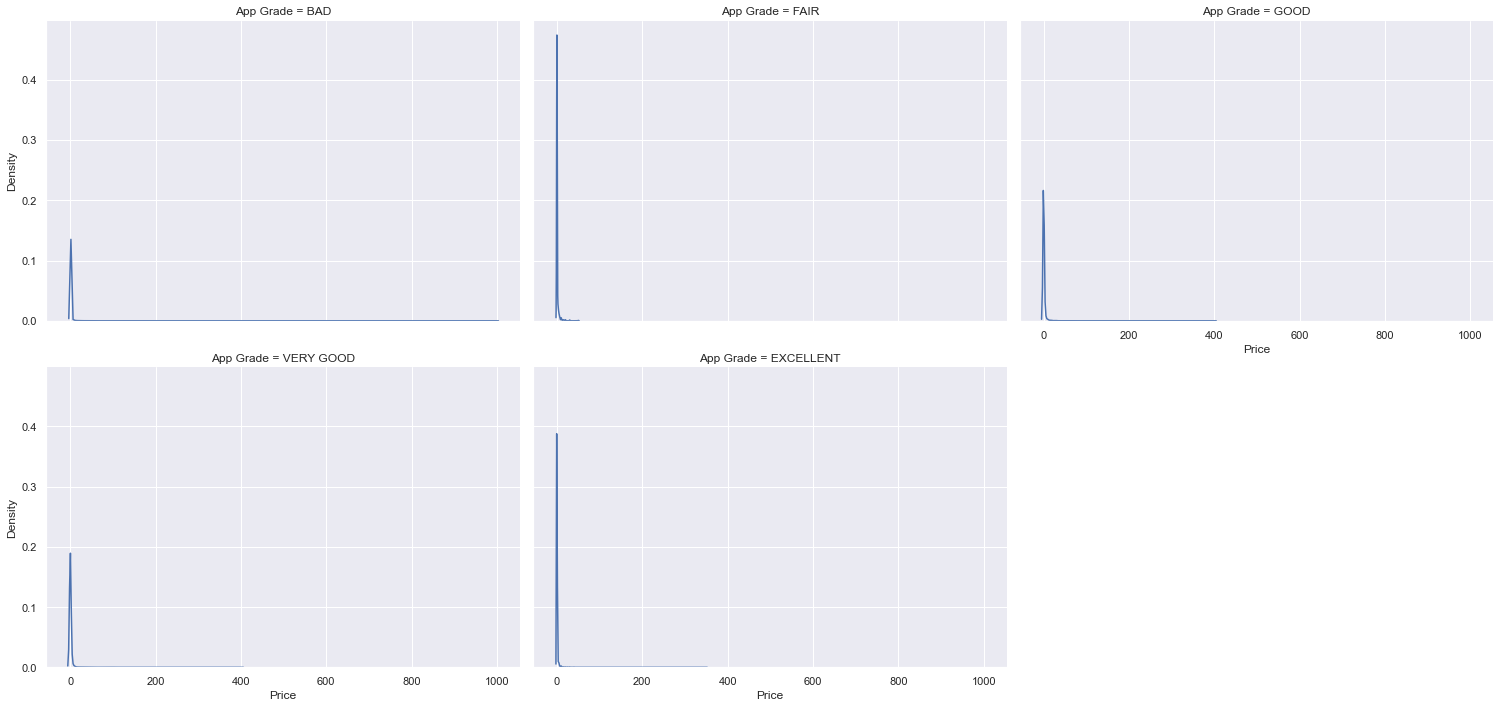

In [35]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="App Grade", col_wrap=3, height=5, aspect=1.4,
                                        col_order=app_grade_order)
eng_supp_app_grade_plot.map(sbn.kdeplot, "Price")

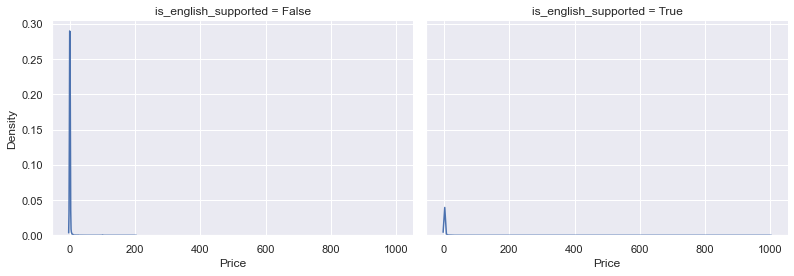

In [36]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="is_english_supported", col_wrap=2, height=4, aspect=1.4)
eng_supp_app_grade_plot.map(sbn.kdeplot, "Price")

In [37]:
df['Rating Count Range'].value_counts()

0             56349
1+            25975
10+            9355
5+             7362
100+           3250
50+            2206
1,000+         1267
500+            848
10,000+         501
5,000+          361
50,000+         130
100,000+        129
500,000+         23
1,000,000+        6
Name: Rating Count Range, dtype: int64

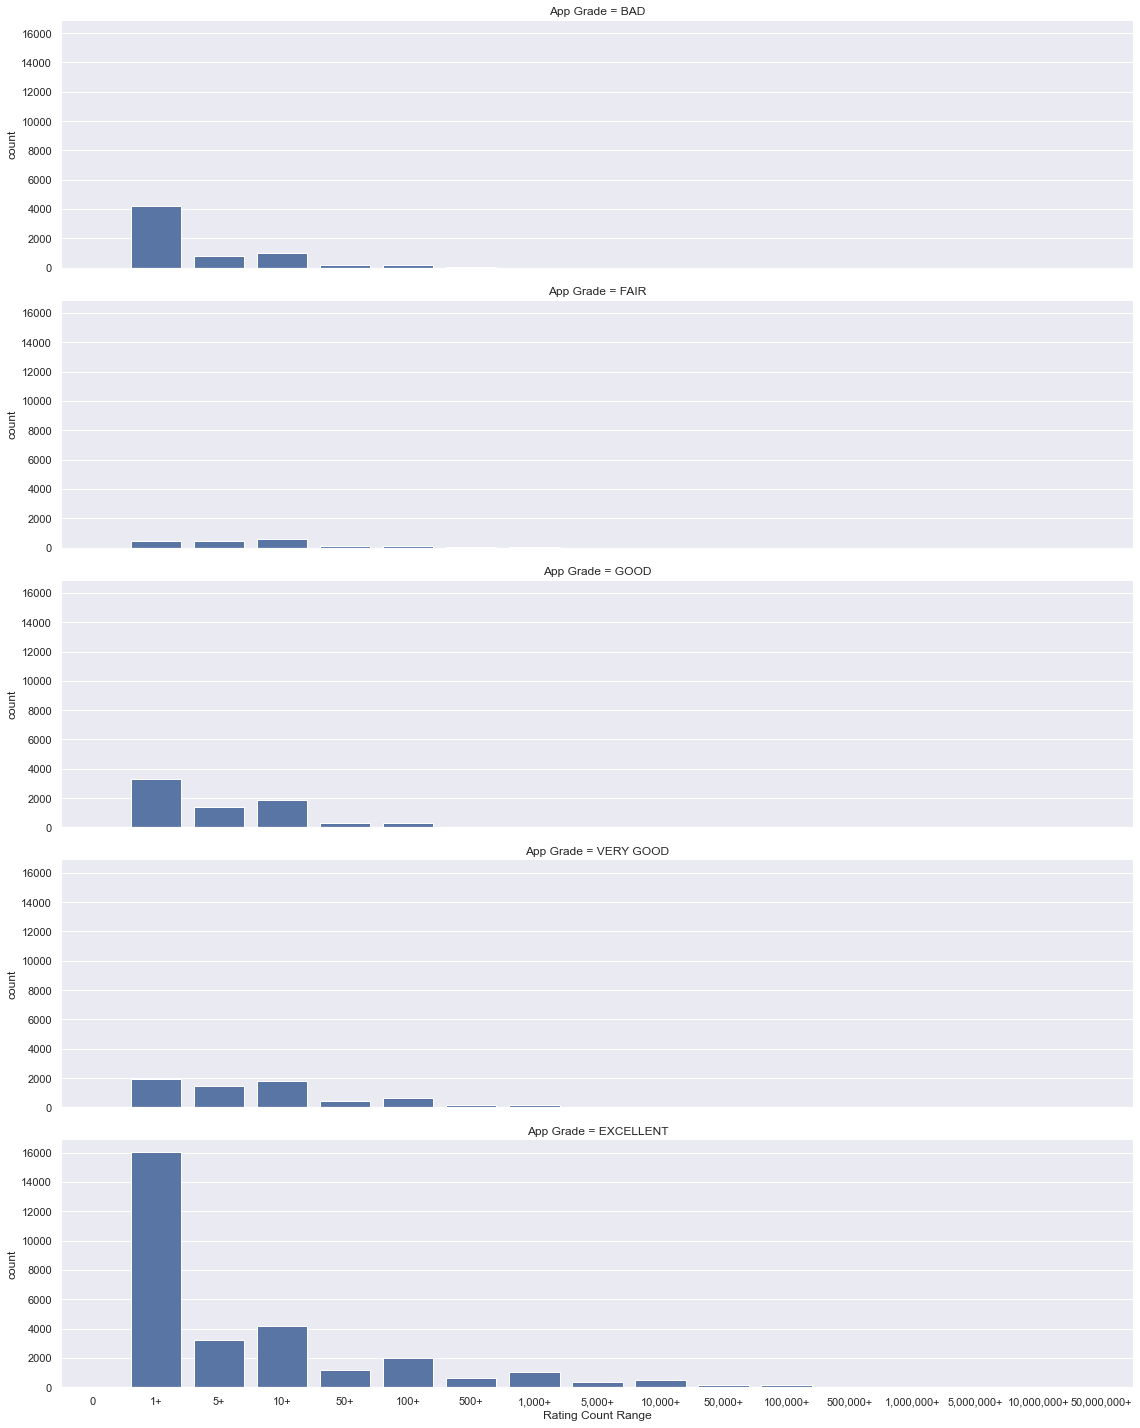

In [38]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="App Grade", col_wrap=1, height=4, aspect=4.0,
                                        col_order=app_grade_order)
eng_supp_app_grade_plot.map(sbn.countplot, "Rating Count Range", order=rating_count_range_order)

In [39]:
df[:5]

,Unnamed: 0,App Name,Size,Age Rating,Languages,Price,InApp Purchase,Average Rating,Rating Count,Privacy Data,App Link,Number of Versions,Last Version Date,First Version Date,App Type,is_english_supported,Service Type,App Grade,Rating Count Range,is_available_in_multiple_langs,is_privacy_data_collected,is_app_ever_updated,is_updated_this_year
0,0,H and W Drug Store,21.5 MB,12+,"English, Spanish",0.00,False,4.0,4,NaN,https://apps.apple.com/us/app/h-and-w-drug-sto...,1,NaN,NaN,MEDICAL,True,FREE,VERY GOOD,1+,True,False,False,False
1,1,H&P-card™,10.1 MB,17+,"English, Spanish",2.99,False,1.0,1,NaN,https://apps.apple.com/us/app/h-p-card/id56971...,5,"Sep 28, 2020","Oct 20, 2012",MEDICAL,True,PAID,BAD,1+,True,False,True,False
2,2,H-Book – osobní zdravotní záznamy,47.1 MB,12+,"English, Czech",0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-book-osobn%C3%...,21,"Jun 28, 2017","Jun 5, 2013",MEDICAL,True,FREE,BAD,0,True,False,True,False
3,3,H-FACT,4.1 MB,12+,English,0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-fact/id1568969345,5,"Nov 24, 2021","Jul 5, 2021",MEDICAL,True,FREE,BAD,0,False,False,True,False
4,4,H-Module,27.6 MB,17+,Not Specified,0.00,False,0.0,0,NaN,https://apps.apple.com/us/app/h-module/id15728...,2,"Jun 26, 2021","Jun 22, 2021",MEDICAL,False,FREE,BAD,0,False,False,True,False


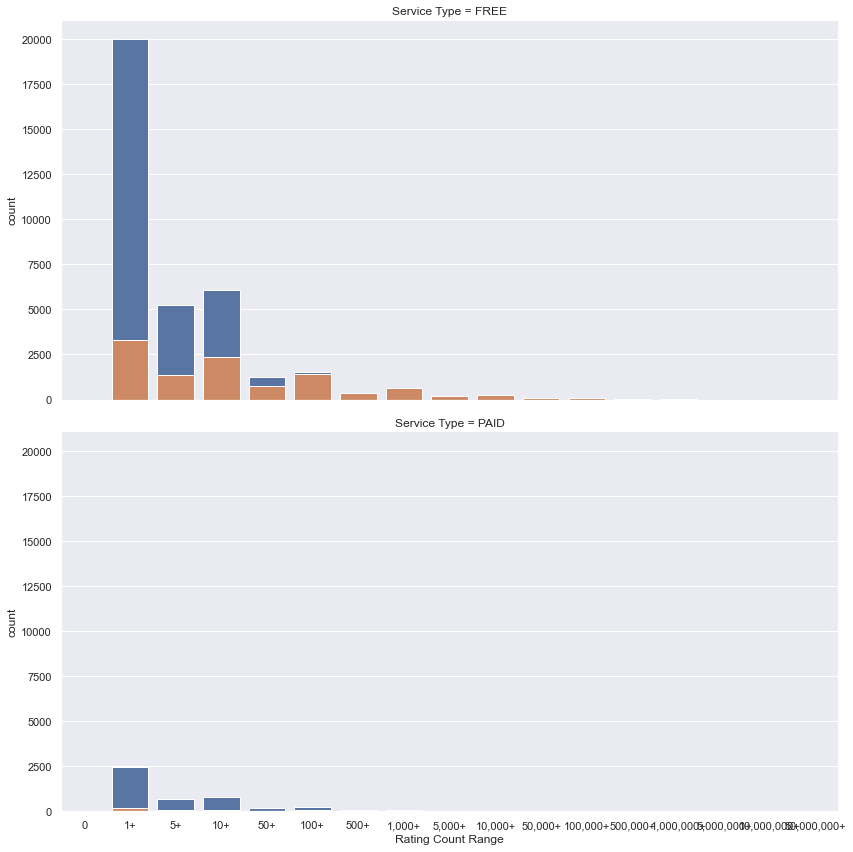

In [40]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="Service Type", col_wrap=1, height=6, aspect=2.0,
                                        hue='InApp Purchase')
eng_supp_app_grade_plot.map(sbn.countplot, "Rating Count Range", order=rating_count_range_order)

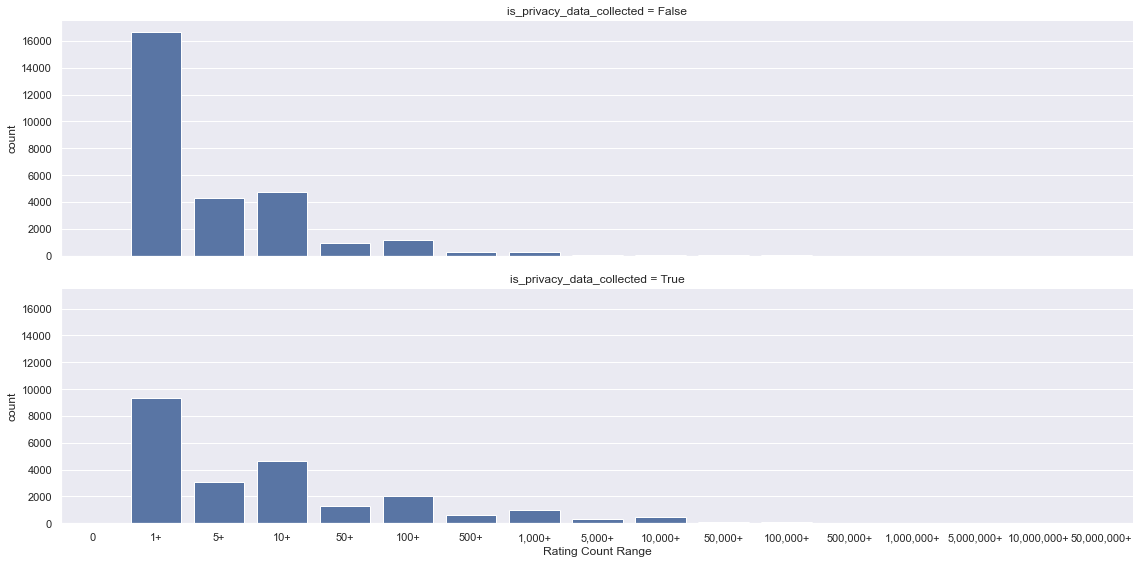

In [41]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="is_privacy_data_collected", col_wrap=1, height=4, aspect=4.0)
eng_supp_app_grade_plot.map(sbn.countplot, "Rating Count Range", order=rating_count_range_order)

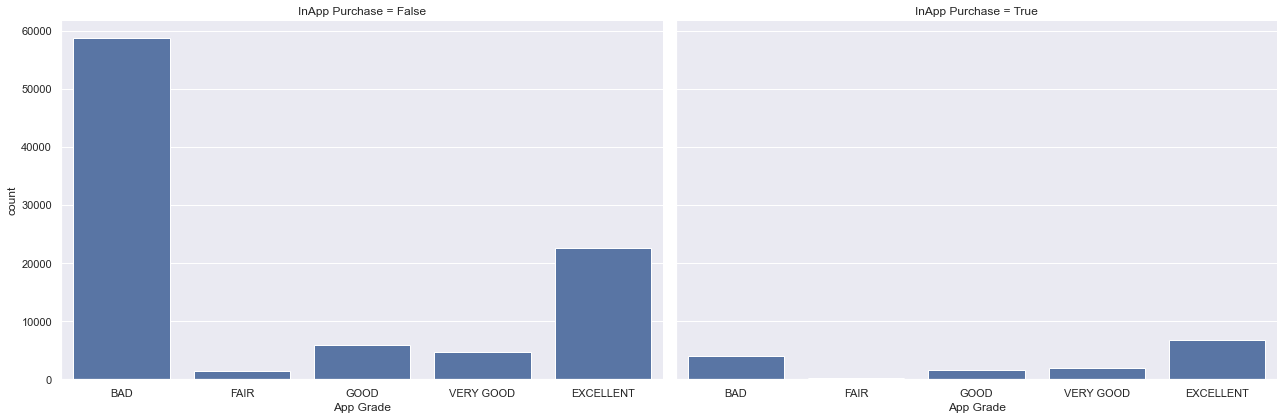

In [42]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="InApp Purchase", col_wrap=2, height=6, aspect=1.5)
eng_supp_app_grade_plot.map(sbn.countplot, "App Grade", order=app_grade_order)

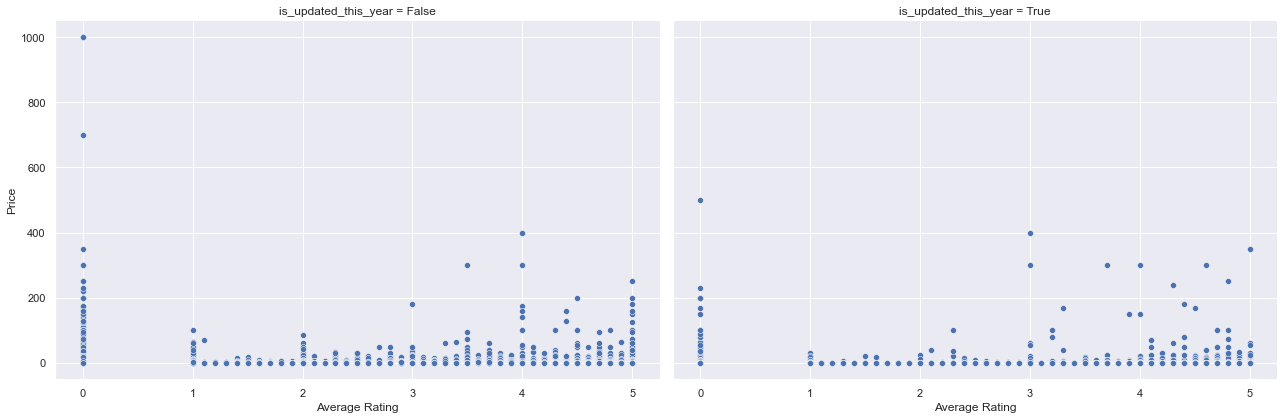

In [43]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="is_updated_this_year", col_wrap=2, height=6, aspect=1.5)
eng_supp_app_grade_plot.map(sbn.scatterplot, 'Average Rating', 'Price')

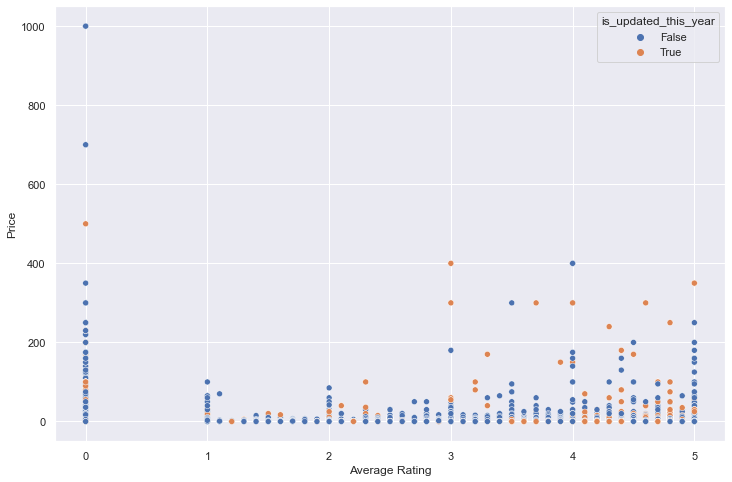

In [44]:
sbn.scatterplot(data=df, x='Average Rating', y='Price', hue='is_updated_this_year', legend='full')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)

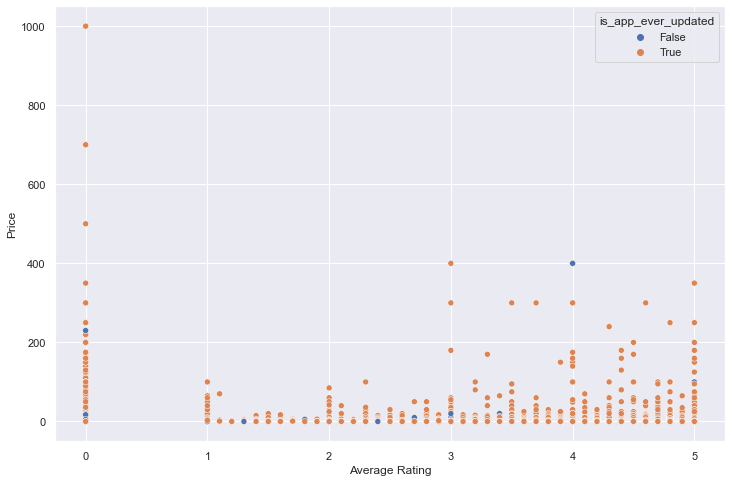

In [54]:
sbn.scatterplot(data=df, x='Average Rating', y='Price', hue='is_app_ever_updated', legend='full')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)

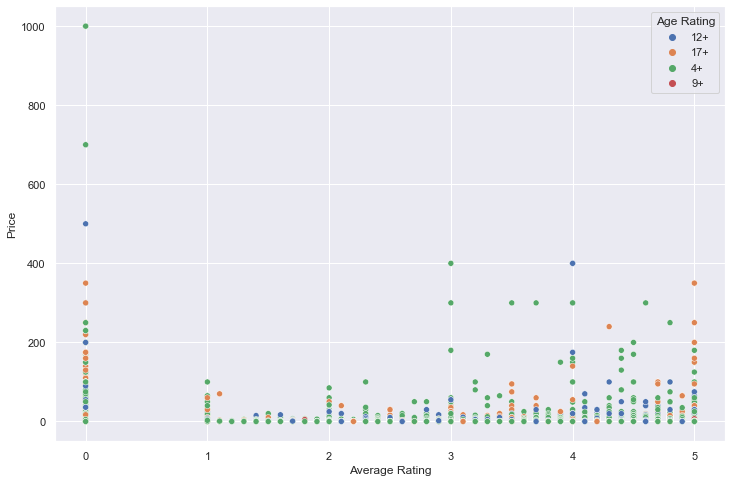

In [55]:
sbn.scatterplot(data=df, x='Average Rating', y='Price', hue='Age Rating', legend='full')
fig = pyplot.gcf()
fig.set_size_inches(12, 8)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


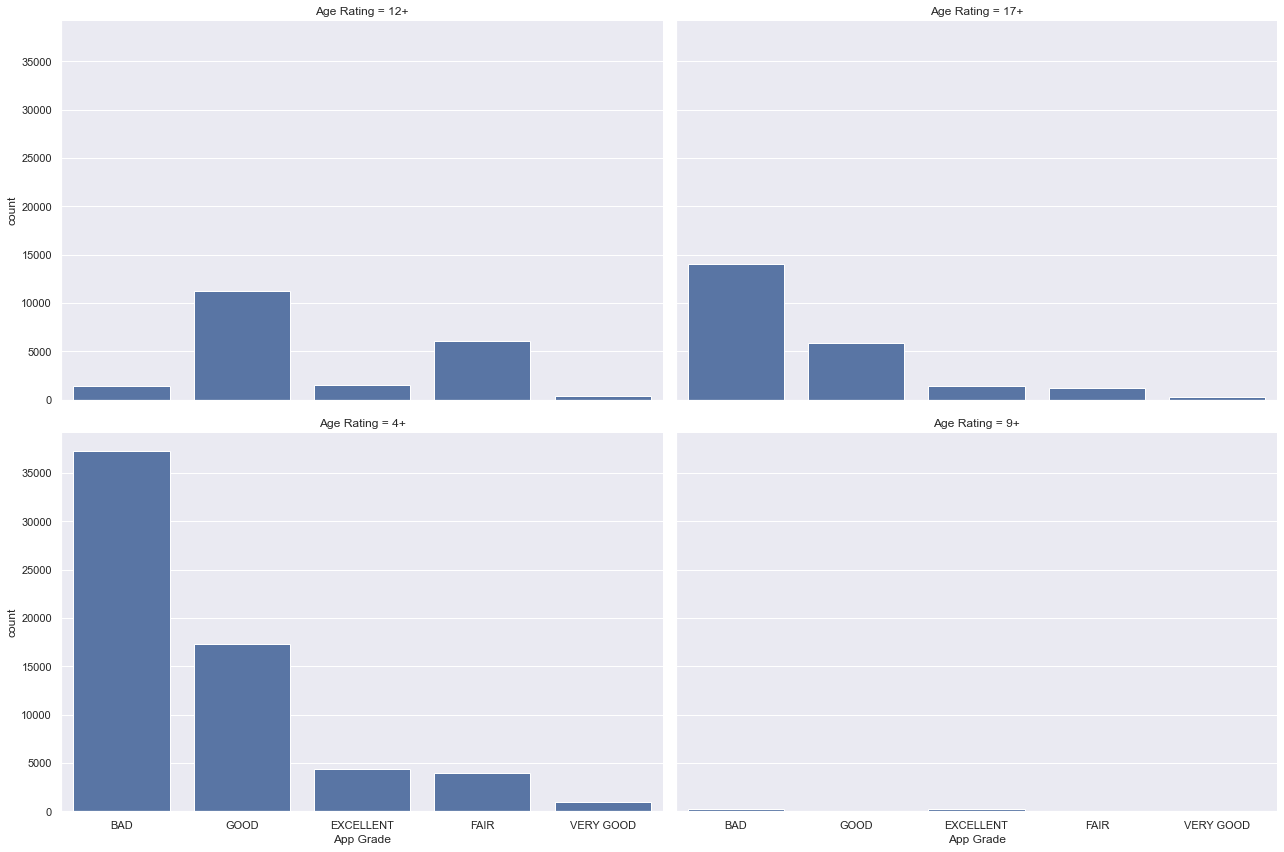

In [57]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="Age Rating", col_wrap=2, height=6, aspect=1.5, 
                                        col_order=None)
eng_supp_app_grade_plot.map(sbn.countplot, 'App Grade')

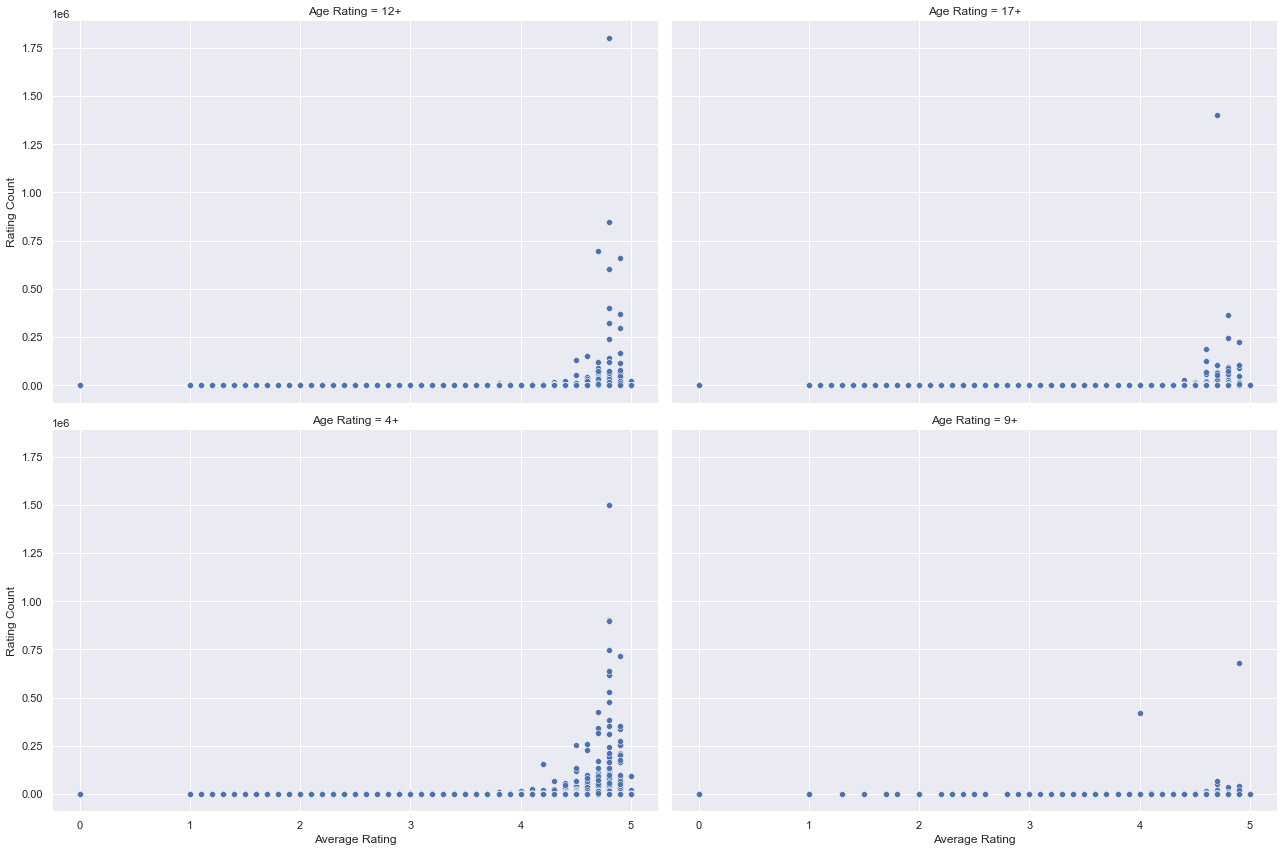

In [47]:
eng_supp_app_grade_plot = sbn.FacetGrid(df, col="Age Rating", col_wrap=2, height=6, aspect=1.5, 
                                        col_order=None)
eng_supp_app_grade_plot.map(sbn.scatterplot, 'Average Rating', 'Rating Count')

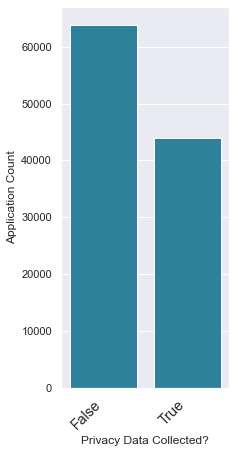

In [48]:
draw_count_plot(df, 'is_privacy_data_collected', 'Privacy Data Collected?', 'Application Count', fig_size=(3,7))

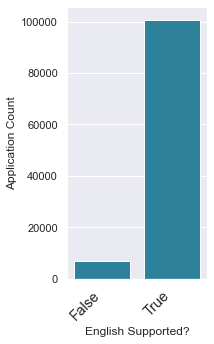

In [49]:
draw_count_plot(df, 'is_english_supported', 'English Supported?', 'Application Count', fig_size=(2.5,5))

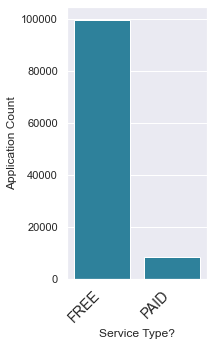

In [50]:
draw_count_plot(df, 'Service Type', 'Service Type?', 'Application Count', fig_size=(2.5,5))

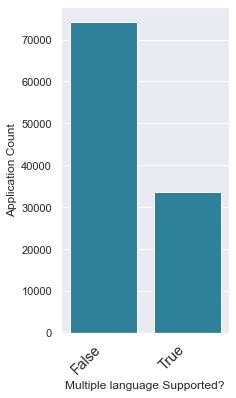

In [51]:
draw_count_plot(df, 'is_available_in_multiple_langs', 'Multiple language Supported?', 'Application Count',
                fig_size=(3,6))

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107762 entries, 0 to 107761
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      107762 non-null  int64  
 1   App Name                        107762 non-null  object 
 2   Size                            107762 non-null  object 
 3   Age Rating                      107762 non-null  object 
 4   Languages                       107762 non-null  object 
 5   Price                           107762 non-null  float64
 6   InApp Purchase                  107762 non-null  bool   
 7   Average Rating                  107762 non-null  float64
 8   Rating Count                    107762 non-null  int64  
 9   Privacy Data                    43996 non-null   object 
 10  App Link                        107762 non-null  object 
 11  Number of Versions              107762 non-null  int64  
 12  Last Version Dat